# **Cloud Cost Optimization & Automation for NexaTech Solutions**
\
# **Overview**
\
### NexaTech Solutions, a mid-sized SaaS company, has experienced rising cloud costs across AWS and Azure over the past year. The CFO has requested an in-depth cloud cost analysis to identify inefficiencies, cost spikes, and potential cost optimization strategies.

### As a Financial Analyst, my role is to analyze 12 months of cloud cost & usage data, uncover trends, detect anomalies, forecast future cloud expenses, and provide data-driven cost-saving recommendations.

\
# 📊 **Project Objectives**



*   Analyze Cloud Spending Trends
*   Detect Cost Anomalies & Unexpected Spikes
*   Forecast Future Cloud Expenses
*   Recommend Cost Optimization Strategies





##1. **Load & Prepare Data**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [ ]:
## Load dataset #Update with your Colb file path
file_path = "/Cleaned_NexaTech_Solutions.csv"
df = pd.read_csv(file_path)

In [ ]:
# Data Cleaning
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d') # Changed the format string to match the actual format of dates in the 'Month' column
df['Cost'] = df['Cost'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(inplace=True)


In [ ]:
# Display Data Overview
print("Data Summary:")
print(df.describe())
print("\nFirst Few Rows of Data:")
print(df.info())

Data Summary:
                     Month         Cost        Usage
count                  480    480.00000   480.000000
mean   2024-06-16 08:00:00   5074.66250  2629.471437
min    2024-01-01 00:00:00    548.09000   122.700000
25%    2024-03-24 06:00:00   2246.67750  1423.365000
50%    2024-06-16 00:00:00   4857.59500  2673.595000
75%    2024-09-08 12:00:00   7370.30000  3845.045000
max    2024-12-01 00:00:00  33165.94000  4998.620000
std                    NaN   3358.26532  1405.703298

First Few Rows of Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       480 non-null    datetime64[ns]
 1   Department  480 non-null    object        
 2   Service     480 non-null    object        
 3   Cost        480 non-null    float64       
 4   Usage       480 non-null    float64       
dtypes: datetime64[ns](1), float64(2), objec

## 2. **Cloud Cost Analysis & Trends**

###Q1.**What are the total cloud costs over the last 12 months?**

In [ ]:
total_cost = df['Cost'].sum()
print(f"Total Cloud Cost Over the Last 12 Months: ${total_cost:.2f}")

Total Cloud Cost Over the Last 12 Months: $2435838.00


<ipython-input-38-5e5be60b3dc7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Cost', data=df, marker='o', ci=None)


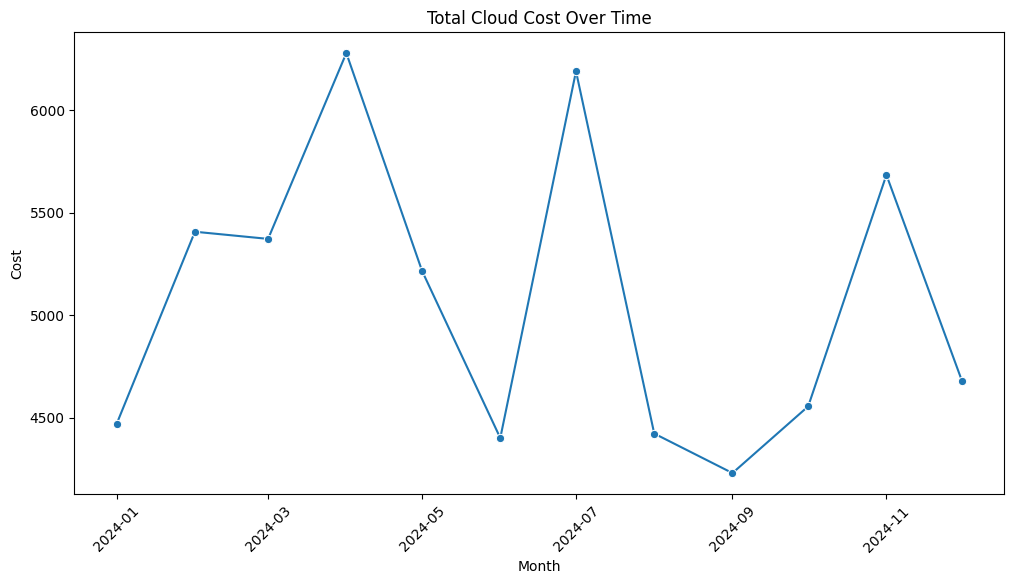

In [ ]:
# Total Cloud Cost Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Cost', data=df, marker='o', ci=None)
plt.title('Total Cloud Cost Over Time')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()

## Q2.**Which services contribute the most to cloud spend?**



**VPC, Lamda, CloudFront, RDS, & EC2**

<ipython-input-20-ce0b445fcb4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_cost.index, y=service_cost.values, palette='viridis')


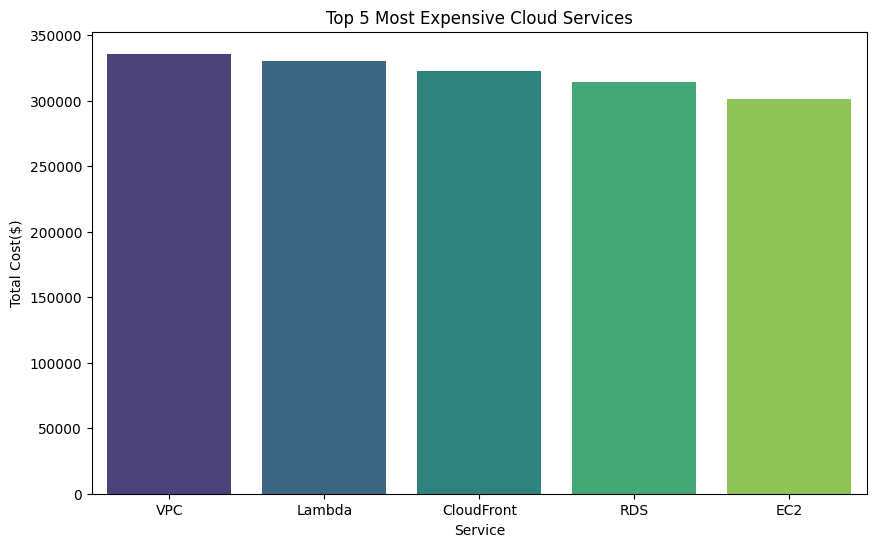

In [ ]:
# Top 5 Most Expensive Services
service_cost = df.groupby('Service')['Cost'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=service_cost.index, y=service_cost.values, palette='viridis')
plt.title('Top 5 Most Expensive Cloud Services')
plt.xlabel('Service')
plt.ylabel('Total Cost($)')
plt.show()

##Q3.**Which department have the highest cloud costs?**


In [ ]:
engineering_total_cost = df[df['Department'] == 'Engineering']['Cost'].sum()
print(f"Engineering has the highest cloud cost at: ${engineering_total_cost:.2f}")

Engineering has the highest cloud cost at: $526194.39


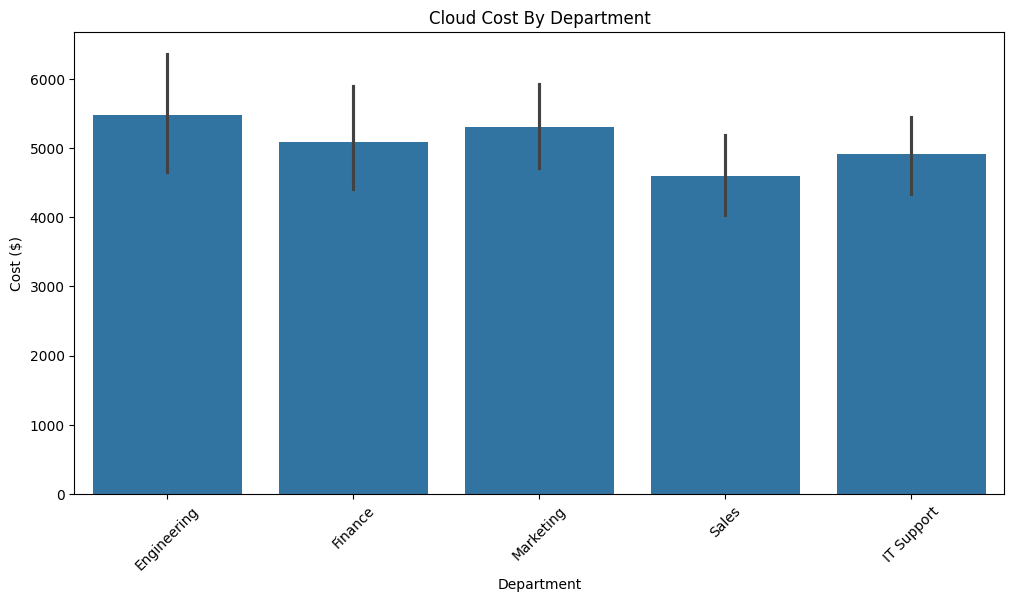

In [ ]:
# Cloud Cost By Department
plt.figure(figsize=(12,6))
sns.barplot(x='Department', y='Cost', data=df)
plt.title('Cloud Cost By Department')
plt.xlabel('Department')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)
plt.show()



---







## Q4.**How does cloud cost correlate with usage?**

0.04 is very close to 0, meaning there is almost no correlation between cloud cost and usage.



In [ ]:
# Calculate the correlation
correlation = df['Cost'].corr(df['Usage'])

In [ ]:
#Print the correlation coefficient
print(f"Correlation Coefficient between Cloud Cost and Usage: {correlation:.2f}")

Correlation Coefficient between Cloud Cost and Usage: 0.04


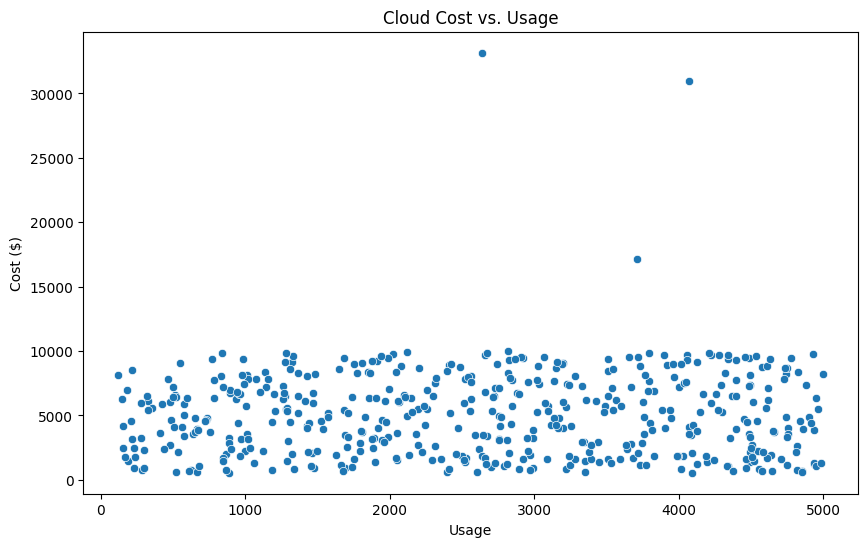

In [ ]:
# Visualize the correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Usage', y='Cost', data=df)  # Just one scatterplot call
plt.title('Cloud Cost vs. Usage')
plt.xlabel('Usage')
plt.ylabel('Cost ($)')
plt.show()

### **Forcasting Future Cost (Next 6 monts)**


## **Q5.What is the projected cloud spend for the next 6 months?**

In [ ]:
# Create a DataFrame for the forecasted data
forecast_dates = pd.date_range(start=forecast_df['Month'].max(), periods=6, freq='M')
forecast_data = pd.DataFrame({'Month': forecast_dates, 'Forecasted Cost': forecast_values})
# Print the forecasted data
print(forecast_data)

        Month  Forecasted Cost
12 2024-12-31    178209.655766
13 2025-01-31    174986.088476
14 2025-02-28    171762.521186
15 2025-03-31    168538.953895
16 2025-04-30    165315.386605
17 2025-05-31    162091.819314


<ipython-input-70-d7416dcdf68e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=forecast_df['Month'].max(), periods=6, freq='M')


In [ ]:
# Prepare Data for Forecasting
# Prepare Data for Forecasting
forecast_df = df.groupby('Month')['Cost'].sum().reset_index()
# Check if enough data points are available for seasonal modeling
if len(forecast_df) < 2 * 12:  # Check if less than 2 seasonal cycles (2 years)
    # If not enough data, remove seasonal component from the model
    model = ExponentialSmoothing(forecast_df['Cost'], trend='add', seasonal=None).fit()
else:
    model = ExponentialSmoothing(forecast_df['Cost'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_values = model.forecast(steps=6)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<ipython-input-29-eda4cd17b53e>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=forecast_df['Month'].max(), periods=6, freq='M'), forecast_values, marker='o', linestyle='dashed', label='Forecasted Cost')


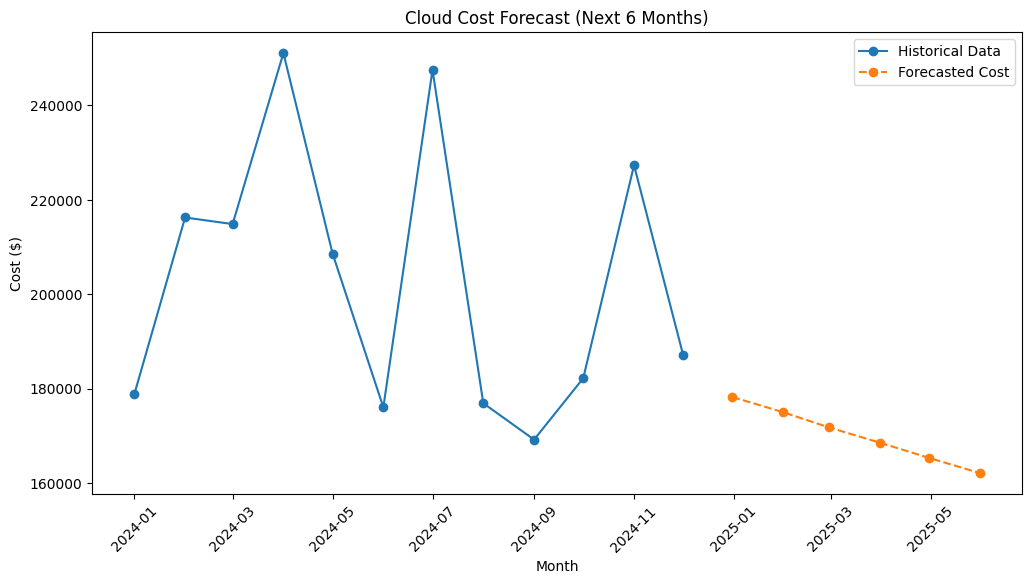

In [ ]:
# Plot Forecast
plt.figure(figsize=(12,6))
plt.plot(forecast_df['Month'], forecast_df['Cost'], marker='o', label='Historical Data')
# Changed periods to 6 to match the length of forecast_values
plt.plot(pd.date_range(start=forecast_df['Month'].max(), periods=6, freq='M'), forecast_values, marker='o', linestyle='dashed', label='Forecasted Cost')
plt.title('Cloud Cost Forecast (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Cost ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## **4. Cost Anomaly Detection**

## Q6. **Are there any unexpected spikes in cloud spending?**


In [ ]:
# Identify Cost Spikes
mean_cost = df['Cost'].mean()
std_cost = df['Cost'].std()
threshold = mean_cost + (2 * std_cost)
anomalies = df[df['Cost'] > threshold]
print("Detected Cost Spikes:")
print(anomalies[['Month','Service','Department','Cost']])

Detected Cost Spikes:
         Month Service   Department      Cost
135 2024-04-01     VPC      Finance  30989.61
402 2024-11-01     RDS  Engineering  17140.14
407 2024-11-01     VPC  Engineering  33165.94


## **Q7. Which months had the highest unexpected cost increases?**
           November

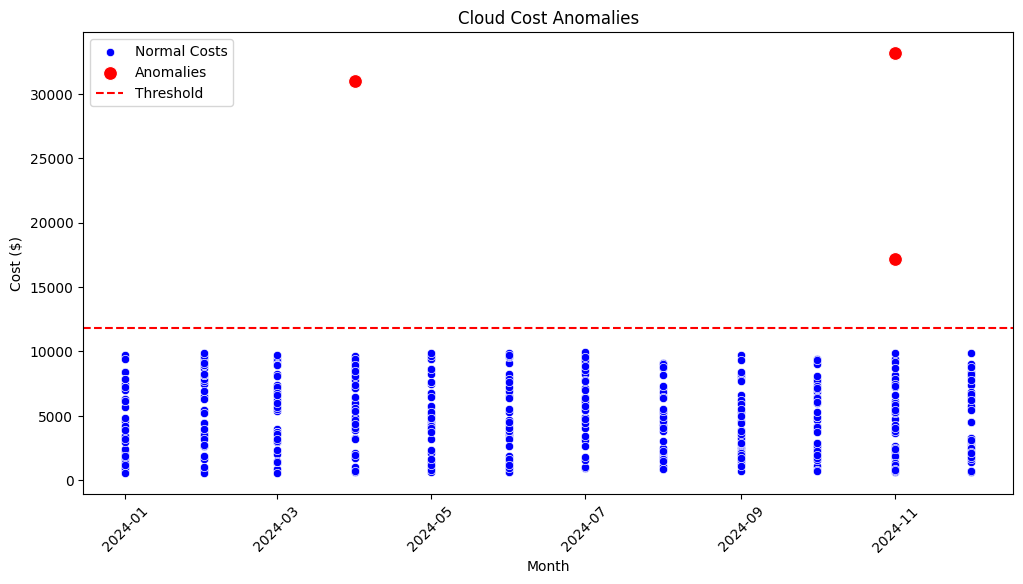

In [ ]:
# Plot Anomalies
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Month'], y=df['Cost'], color='blue',label='Normal Costs')
sns.scatterplot(x=anomalies['Month'], y=anomalies['Cost'], color='red', label='Anomalies', s=100)
plt.axhline(y=threshold, color='red', linestyle='dashed', label='Threshold')
plt.title('Cloud Cost Anomalies')
plt.xlabel('Month')
plt.ylabel('Cost ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## **5. Recommend Cost Optimization Strategies**

**5.A Identify Underutilized Services (Rightsizing Opportunities)**

In [74]:
# Compute cost per unit of usage
df['Cost_per_Usage'] = df['Cost'] / df['Usage']

# Define percentiles for high cost and low usage
high_cost_percentile = 0.90  # Top 10% cost
low_usage_percentile = 0.10  # Bottom 10% usage

# Filter for underutilized services
underutilized_services = df[
    (df['Cost'] > df['Cost'].quantile(high_cost_percentile)) &
    (df['Usage'] < df['Usage'].quantile(low_usage_percentile))
]

# Show results
print("🔍 Underutilized Services (High Cost, Low Usage):")
print(underutilized_services[['Month', 'Service', 'Department', 'Cost', 'Usage', 'Cost_per_Usage']])

🔍 Underutilized Services (High Cost, Low Usage):
         Month Service   Department     Cost  Usage  Cost_per_Usage
204 2024-06-01     EKS  Engineering  9101.13  547.3       16.629143


### **5.B Departments Overspending on Underutilized Resources**

In [75]:
# Aggregate cost and usage per department
department_cost_usage = df.groupby('Department').agg({'Cost': 'sum', 'Usage': 'sum'}).reset_index()

# Compute cost per unit of usage for each department
department_cost_usage['Cost_per_Usage'] = department_cost_usage['Cost'] / department_cost_usage['Usage']

# Find departments with highest cost per usage
high_spending_departments = department_cost_usage.sort_values(by='Cost_per_Usage', ascending=False)

# Show results
print("💰 Departments Overspending on Cloud Resources:")
print(high_spending_departments)


💰 Departments Overspending on Cloud Resources:
    Department       Cost      Usage  Cost_per_Usage
1      Finance  487963.52  238190.43        2.048628
0  Engineering  526194.39  257333.94        2.044792
3    Marketing  508495.09  259106.55        1.962494
4        Sales  441107.28  236207.38        1.867458
2   IT Support  472077.72  271307.99        1.740007


### **5.C Can Auto-Scaling & Reserved Instances Reduce Costs?**

In [76]:
# Compute standard deviation of cost per service
cost_variance = df.groupby('Service')['Cost'].std().reset_index()
cost_variance.columns = ['Service', 'Cost_Variation']

# Identify services with high cost variance (auto-scaling candidates)
high_variance_services = cost_variance[cost_variance['Cost_Variation'] > cost_variance['Cost_Variation'].quantile(0.75)]

print("📊 Services with High Cost Variability (Good for Auto-Scaling):")
print(high_variance_services)

# Identify services with stable, high costs (Reserved Instance candidates)
stable_high_cost_services = cost_variance[(cost_variance['Cost_Variation'] < cost_variance['Cost_Variation'].quantile(0.25))]

print("💡 Services with Stable High Costs (Good for Reserved Instances):")
print(stable_high_cost_services)


📊 Services with High Cost Variability (Good for Auto-Scaling):
  Service  Cost_Variation
5     RDS     3270.534272
7     VPC     5569.321134
💡 Services with Stable High Costs (Good for Reserved Instances):
    Service  Cost_Variation
1  DynamoDB     2732.792616
2       EC2     2745.785048
